# Comunicate Data Findings: PISA (Program for International Student Assessment)

This document explores the 2012 PISA report dataset, which contains data related to the preparation of students for real-life challenges.

## Overview of the dataset

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
df_pisa = pd.read_csv('pisa2012.csv', encoding="latin-1", low_memory = False)

In [123]:
df_pisa.shape

(485490, 636)

Because the file is huge (contains 636 variables and 485490 observations), only 22 variables have been chosen. As the names of the variables are not very explanatory, they have been changed to more appropriate ones.

In [129]:
#Select desired columns
df = df_pisa[['CNT', 'ST04Q01', 'AGE', 'IMMIG', 'ST25Q01', 'CULTDIST', 'FAMSTRUC', 'HISCED', 'HEDRES', 'WEALTH', 'HOMEPOS',
'CULTPOS', 'ST43Q01', 'ST53Q01', 'BELONG', 'TIMEINT', 'LMINS', 'MMINS', 'SMINS', 'PV1MATH', 'PV1READ', 'PV1SCIE']]

In [48]:
#Assign explanatory names
df.rename({'CNT': 'country', 'ST04Q01': 'gender', 'AGE': 'age', 'IMMIG': 'immigration_status', 'ST25Q01': 'international_language_home', 'CULTDIST': 'cultural_dist', 'FAMSTRUC': 'family_structure', 'HISCED': 'highest_education_parents', 'HEDRES': 'home_educational_resources', 'WEALTH': 'wealth',
'HOMEPOS': 'home_possessions', 'CULTPOS': 'cultural_possessions', 'ST43Q01': 'perceived_control', 'ST53Q01': 'learning_strategies', 'BELONG': 'sense_belonging', 'TIMEINT': 'time_computer_use', 'LMINS': 'language_learning_time', 'MMINS': 'math_learning_time', 'SMINS': 'science_learning_time', 
           'PV1MATH': 'math_score', 'PV1READ': 'reading_score', 'PV1SCIE': 'science_score'}, axis = 'columns', inplace = True)

C:\Users\rvile\anaconda3\envs\visualization\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [124]:
#Overview of data composition
print(df.head())
df.info()

   country  gender    age immigration_status international_language_home  \
0  Albania  Female  16.17             Native        Language of the test   
1  Albania  Female  16.17             Native        Language of the test   
2  Albania  Female  15.58             Native        Language of the test   
3  Albania  Female  15.67             Native        Language of the test   
4  Albania  Female  15.50             Native        Language of the test   

   cultural_dist  family_structure highest_education_parents  \
0            NaN               2.0         ISCED 3A, ISCED 4   
1            NaN               2.0               ISCED 5A, 6   
2            NaN               2.0               ISCED 5A, 6   
3            NaN               2.0               ISCED 5A, 6   
4            NaN               2.0         ISCED 3A, ISCED 4   

   home_educational_resources  wealth  ...  perceived_control  \
0                       -1.29   -2.92  ...              Agree   
1                        1.1

## Which is the structure of the dataset?

Out of the 22 variables that have been chosen, 8 are categorical in nature, while the remaining 14 are numerical. Although some of these variables are easy to understand, there are others that need further explanation given in the chapter 16 of the [PISA technical report](https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf):

- **Inmigration status**: (1) native parent (those parents who had at least one parent (students’ grandparent) born in the country of the assessment); (2) second generation parent (those born in the country of assessment but whose parent(s) were born in another country); (3) first-generation parent (those parent born outside the country of assessment and whose parents were also born outside the country of assessment). Parents with missing responses for either the parent or for both grandparents were assigned missing values for these


- **International Language at Home**: (1) language at home is the same as the language of assessment for that student and (2) language at home is another language.


- **Family Structure**: “1” if “single parent family” (students living with only one of the following: mother, father, male guardian, female guardian), “2” if “two parent family” (students living with a father or step/foster father and a mother or step/foster mother) and “3” for students who do not live with their parents.


- **Highest educational level of parents**: (0) None, (1) ISCED 3A (general upper secondary) and/or ISCED 4 (non-tertiary post-secondary), (2) ISCED 5B (vocational tertiary), (3) ISCED 5A, 6 (theoretically oriented tertiary and post-graduate).


- **Home Possessions**: This index is a summary of all household items from the columns wealth, cultural_possessions and home_educational_resources, but it also included the variable indicating the number of books at home (ST28) which was recoded from the original six categories into three: (0) 0-25 books, (1) 26-100 books, (2) more than 100.

<img src="Possesions table report.png" alt="400" width="800"/>

- **Sense of belonging**: This indicates the degree to which each student feels that he or she belongs to his or her school. The PISA report states that this indicator has a moderate to low reliability.


- **Learning strategies**: Learn the important parts of the subject, relate new knowledge to existing concepts and learn by heart.



## Which are the main features of interest?

The variables that will serve as a reference point in this dataset will be the scores in mathematics, reading and science.

## What features will help support the investigation into the features of interest?

From an initial point of view, it is assumed that the greater influence on the score obtained will be associated with a longer learning time in each of the subjects. To a lesser extent, family structure, immigration status, parental education and wealth are expected to have a significant impact on the score.

## Univariate exploration

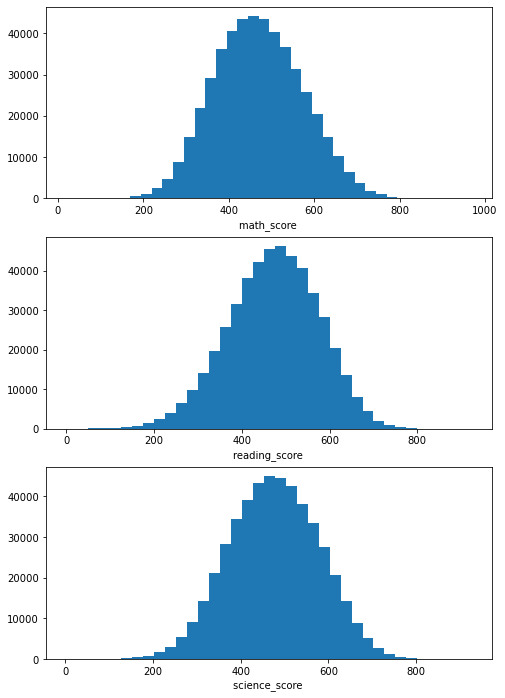

In [127]:
# re-plot the distribution of scores.
fig, ax = plt.subplots(nrows=3, figsize = [8,12])
bin_size = 25
variables = ['math_score', 'reading_score', 'science_score']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df[var]), max(df[var])+bin_size, bin_size)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('{} '.format(var))

plt.show()

The scores of the three subjects present a normal distribution with an average close to 500 points out of 1000.

language_learning_time
math_learning_time
science_learning_time


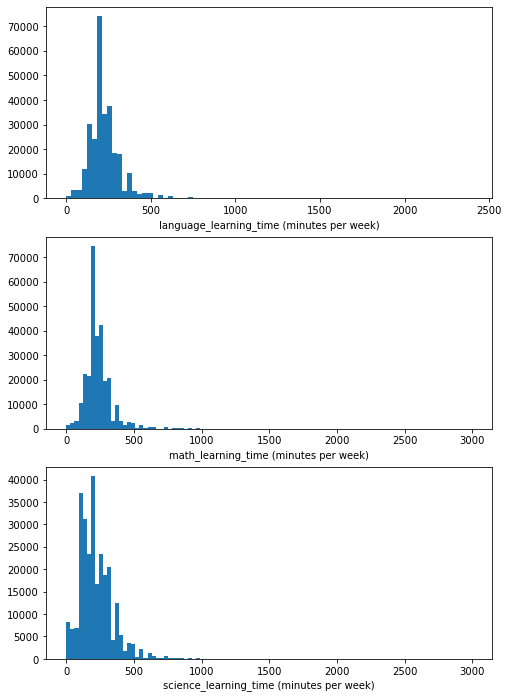

In [121]:
# re-plot the distribution of time studying.
fig, ax = plt.subplots(nrows=3, figsize = [8,12])
bin_size = 30
variables = ['language_learning_time', 'math_learning_time', 'science_learning_time']
for i in range(len(variables)):
    var = variables[i]
    print(var)
    bins = np.arange(np.nanmin(df[var]), np.nanmax(df[var])+bin_size, bin_size)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('{} (minutes per week)'.format(var))
    
plt.show()

In [114]:
df.sense_belonging.describe()

count    313399.000000
mean         -0.022259
std           0.983503
min          -3.690000
25%          -0.740000
50%          -0.150000
75%           0.560000
max           2.630000
Name: sense_belonging, dtype: float64

In [59]:
bins_belonging = np.arange(-3.62, 2.63+1.25, 1.25)

In [60]:
bins_belonging

array([-3.62, -2.37, -1.12,  0.13,  1.38,  2.63])